<a href="https://colab.research.google.com/github/Mohan0332/Capstone/blob/main/notebook%20with%20performance%20evaluation%20metrics%20for%20FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###InceptionV3

In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Define the directories containing the training and testing data
train_dir = '/content/drive/MyDrive/Capstone dataset/Images-out_RGB/train'
test_dir = '/content/drive/MyDrive/Capstone dataset/Images-out_RGB/test'

# Define the InceptionV3 model
inception = InceptionV3(include_top=False, pooling='avg')

# Define a function to extract features from a given image file
def extract_features(file_path):
    img = image.load_img(file_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    features = inception.predict(x)
    return features

# Define a function to extract features from a directory of images
def extract_features_from_dir(dir_path):
    features = []
    labels = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('.jpg','.png')):
                file_path = os.path.join(root, file)
                label = os.path.basename(root)
                feature = extract_features(file_path)
                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Extract features from the training and testing directories
train_features, train_labels = extract_features_from_dir(train_dir)
test_features, test_labels = extract_features_from_dir(test_dir)



1/1 [==============================] - 0s 228ms/step


In [2]:
# Flatten the features for use in a linear SVM
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

In [3]:
train_features.shape

(490, 1, 2048)

In [ ]:
# Convert the labels to integers
train_labels = np.array([int(label) for label in train_labels])
test_labels = np.array([int(label) for label in test_labels])

In [6]:
#Logistic Regression

In [74]:
# Train a linear SVM on the flattened features
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_features_flat, train_labels)

# Evaluate the SVM on the test data
accuracy = logreg.score(test_features_flat, test_labels)
print('Accuracy:', accuracy)

Accuracy: 0.7894736842105263


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
y_pred_lr = logreg.predict(test_features_flat)

Performance evaluation for logistic regression

In [77]:
#confusion matrix
cm_lr = confusion_matrix(test_labels, y_pred_lr)
print(cm_lr)

[[27  7]
 [ 5 18]]


In [78]:
roc_auc_lr = roc_auc_score(test_labels, y_pred_lr)

print('ROC-AUC score for MLP:', roc_auc_lr)

ROC-AUC score for MLP: 0.7883631713554987


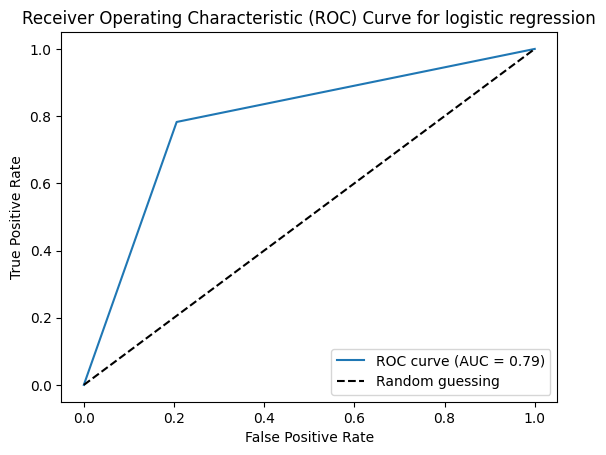

In [79]:
#roc curve
fpr_lr, tpr_lr, _ = roc_curve(test_labels,y_pred_lr)


# plot the ROC curve
plt.plot(fpr_lr, tpr_lr, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for logistic regression')
plt.legend(loc='lower right')
plt.show()

In [81]:
# Compute precision, recall, and F1-score for each class
precision_lr, recall_lr, f1_score_lr, _ = precision_recall_fscore_support(test_labels, y_pred_lr)

# Print the metrics for each class
for i in range(len(precision_lr)):
    print('Class {}: Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}'.format(i, precision_lr[i], recall_lr[i], f1_score_lr[i]))

Class 0: Precision = 0.84, Recall = 0.79, F1-score = 0.82
Class 1: Precision = 0.72, Recall = 0.78, F1-score = 0.75


In [9]:
#MLP standalone

In [61]:
# Train a MLP classifier on the flattened features
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,100), max_iter=1000)
mlp.fit(train_features_flat, train_labels)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000)

In [63]:
y_pred_mlp =mlp.predict(test_features_flat)

In [62]:
# Evaluate the MLP classifier on the test data
accu = mlp.score(test_features_flat, test_labels)
print('Accuracy:', accu)

Accuracy: 0.8070175438596491


Performance evaluation for MLP

In [67]:
from sklearn.metrics import roc_auc_score

# assuming y_true and y_pred are arrays of true and predicted labels, respectively
roc_auc = roc_auc_score(test_labels, y_pred_mlp)

print('ROC-AUC score for MLP:', roc_auc)

ROC-AUC score for MLP: 0.7960358056265985


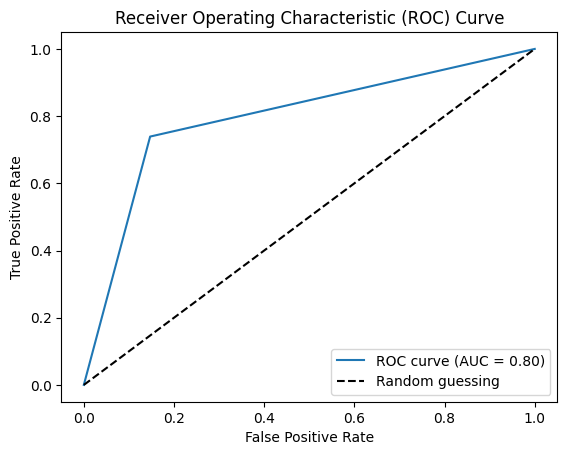

In [72]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# assuming y_true and y_pred are arrays of true and predicted labels, respectively
fpr, tpr, _ = roc_curve(test_labels,y_pred_mlp)


# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_mlp)
print(cm)

[[29  5]
 [ 6 17]]


In [71]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, y_pred_mlp)

# Print the metrics for each class
for i in range(len(precision)):
    print('Class {}: Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}'.format(i, precision[i], recall[i], f1_score[i]))

Class 0: Precision = 0.83, Recall = 0.85, F1-score = 0.84
Class 1: Precision = 0.77, Recall = 0.74, F1-score = 0.76


Common ROC curve plot

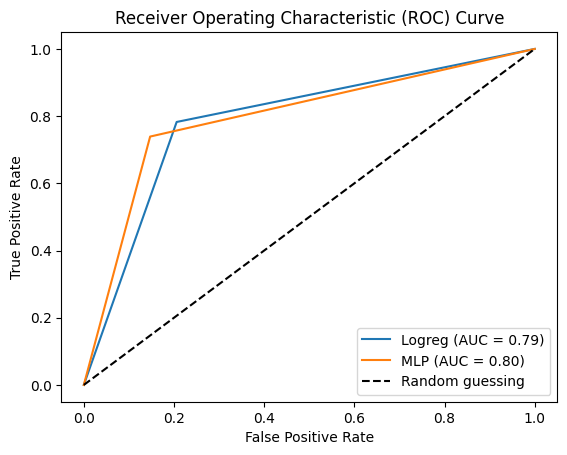

In [80]:
# plot the ROC curve
plt.plot(fpr_lr, tpr_lr, label='Logreg (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr,tpr,label='MLP (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()